In [12]:
import cv2 
import matplotlib.pyplot as plt

In [15]:
img1 = cv2.imread('robot.jpg')
img1.shape

(6720, 4480, 3)

In [13]:
sift_d = cv2.SIFT_create()# scale invarient feature transfrom
orb_d = cv2.ORB_create()#oriented Fast and Rotated Breif
surf_d = cv2.xfeatures2d.SURF()#speeded up robust features

In [16]:
kp1, des1 = sift_d.detectAndCompute(img1,None) #keypoints, descripters

In [18]:
len(kp1)

4294

In [19]:
img2 = cv2.imread('robot1.jpg')
kp2, des2 = sift_d.detectAndCompute(img2,None)
len(kp2)


5551

In [21]:
kp10 = kp1[1]
kp10.size

1.9571094512939453

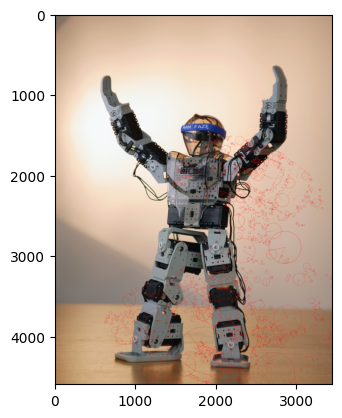

In [24]:
img2_kp = cv2.drawKeypoints(
    img2, kp1, 0, (0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)
plt.imshow(img2_kp[:,:,::-1])

In [25]:
des1

array([[34., 15.,  9., ...,  0.,  2., 34.],
       [ 9.,  2.,  0., ...,  2.,  4.,  9.],
       [ 3.,  2.,  2., ...,  0.,  3.,  9.],
       ...,
       [ 7.,  3.,  6., ...,  4.,  5., 25.],
       [17., 49.,  3., ..., 12., 12.,  4.],
       [ 1.,  2.,  5., ...,  1.,  1.,  1.]], dtype=float32)

In [27]:
des1.shape

(4294, 128)

In [28]:
matcher = cv2.BFMatcher()

In [31]:
matches = matcher.knnMatch(des1,des2,k = 2)
len(matches)

4294

In [33]:
count = 0
th = 20
for m1, m2 in matches:
    gap = abs(m1.distance - m2.distance)
    if gap < th:
        count += 1
print(count, len(matches))
    

3256 4294
